# Diabetes Dataset
#1 perform basic EDA
#2 apply KMeans clustering
#3 Apply hierarchial clustering
#4 find Random score and silhoutte coeffecient
#5 apply PCA
#6 apply logistic regression 
#6 apply decision tree (classifier) 
#7 apply random forest (classifier)



In [6]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.cluster import KMeans,AgglomerativeClustering #KMeans clustering Library

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
# Splitting the Data in train and test
from sklearn.model_selection import train_test_split

In [10]:
diab= pd.read_csv("C://Users//AMIT YADAV//Downloads//UNSUPERVISED LEARNING//datasets//diabetes.csv")

In [11]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diab.shape

(768, 9)

In [13]:
diab.info()  #note- when there is preganancies chances of diabetes are high

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
diab[diab.BloodPressure==0].count() #blood pressure can be 0 read from net

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

# Performing EDA

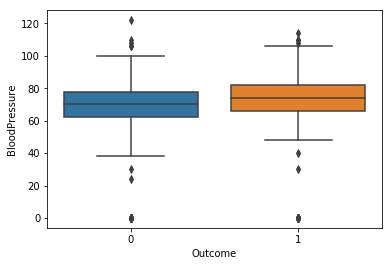

In [15]:
#blood pressure vs outcome
sns.boxplot(x='Outcome',y='BloodPressure',data=diab)

# so here diab people habe high BP as comparison to non diab people

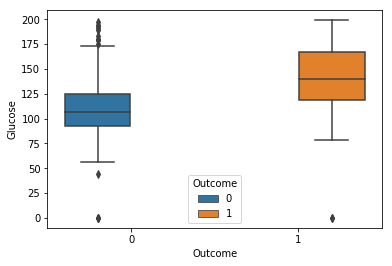

In [66]:
sns.boxplot(x = "Outcome", y = "Glucose", data=diab, hue = "Outcome")
#diabetic people have higher glucose levels

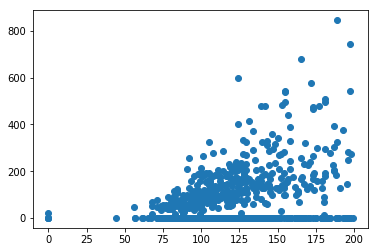

In [67]:
#check if any pattern exist between insulin and glucose
plt.scatter(diab.Glucose,diab.Insulin)
#we get that high glucose means high insulin

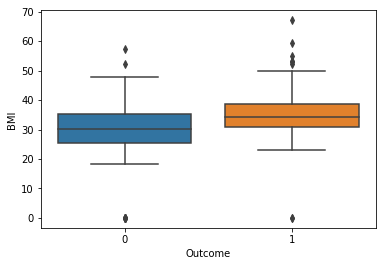

In [16]:
sns.boxplot(x='Outcome',y='BMI',data=diab)
#SO people have high BMI have higher chance of diabeties


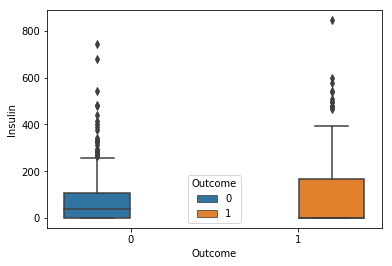

In [68]:
sns.boxplot(x = "Outcome", y = "Insulin", data=diab, hue = "Outcome")

# Doing Feature Engineering

In [17]:
#doing feature engineering
#feature extraction-BMI scale
#BMI SCALE  18-25 HEALTHY, 25-29 overweight, 30-39-obese, >39: adnan sami


In [18]:
if (diab.BMI[1]>30):
    print('yes')
else:
    print('no')
    

no


In [146]:
diab.shape[0]

768

In [19]:
bmi_labels=[]

for i in range(0, diab.shape[0]):
    if (diab['BMI'][i]>30):
        bmi_labels.append('Obese')
    else:
        bmi_labels.append('Healthy')

In [20]:
diab['BMI Labels']=bmi_labels

In [21]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Labels
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Healthy
2,8,183,64,0,0,23.3,0.672,32,1,Healthy
3,1,89,66,23,94,28.1,0.167,21,0,Healthy
4,0,137,40,35,168,43.1,2.288,33,1,Obese


In [22]:
def bmi_labs(x):
    if x<30:
        return ('overweight')
    elif x<25:
        return('healthy')
    else:
        return('Obese')        

In [23]:
diab['BMI'].apply(bmi_labs)

0           Obese
1      overweight
2      overweight
3      overweight
4           Obese
5      overweight
6           Obese
7           Obese
8           Obese
9      overweight
10          Obese
11          Obese
12     overweight
13          Obese
14     overweight
15          Obese
16          Obese
17     overweight
18          Obese
19          Obese
20          Obese
21          Obese
22          Obese
23     overweight
24          Obese
25          Obese
26          Obese
27     overweight
28     overweight
29          Obese
          ...    
738         Obese
739         Obese
740         Obese
741         Obese
742    overweight
743         Obese
744         Obese
745         Obese
746         Obese
747         Obese
748         Obese
749    overweight
750         Obese
751         Obese
752    overweight
753         Obese
754         Obese
755         Obese
756         Obese
757         Obese
758         Obese
759         Obese
760    overweight
761         Obese
762    ove

# Applying one hot encoding

In [92]:
#applying one hot encoding on all the categorical columns
dummy_diab=pd.get_dummies(diab)

In [93]:
dummy_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Labels_Healthy,BMI Labels_Obese
0,6,148,72,35,0,33.6,0.627,50,1,0,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1


In [94]:
dummy_diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BMI Labels_Healthy', 'BMI Labels_Obese'],
      dtype='object')

In [96]:
newdiab=dummy_diab.drop('Outcome',axis=1)

# Applying standard scalar

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_diab=pd.DataFrame(sc.fit_transform(newdiab),columns=newdiab.columns)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [98]:
scaled_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI Labels_Healthy,BMI Labels_Obese
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,-0.807225,0.807225
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,1.238811,-1.238811
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.238811,-1.238811
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,1.238811,-1.238811
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,-0.807225,0.807225


# APPLYING KMEANS CLUSTERING

# ELBOW PLOT

In [119]:
wcss=[]

for i in range(1,10):#loop will run 1 to 10 times
    k=KMeans(n_clusters=i)#defined the K
    k.fit_predict(scaled_diab)
    wcss.append(k.inertia_)

In [120]:
wcss

[7680.0,
 5535.376675402387,
 4923.013035655895,
 4470.800011080443,
 4045.1832786352916,
 3699.6167720479616,
 3523.2395296610866,
 3284.9348619113557,
 3160.5935598110195]

Text(0.5, 1.0, 'pca components')

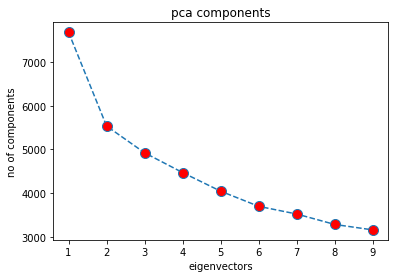

In [121]:
plt.plot(range(1,10),wcss, '-o',linestyle='dashed',markerfacecolor='red',markersize=10)  #-o represents line type
#so from plot we get optimal value of clusters =3
plt.xlabel('eigenvectors')
plt.ylabel('no of components')
plt.title('pca components')

In [134]:
labels=diab['Outcome']  #target column

In [135]:
labels.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [136]:
#applying kmeans clustering
#initiate the k means algorithm
k=KMeans(n_clusters=2)  #since here the clusters are 3 ie sentosa,versicolor and virginica


In [137]:
#since the fit and predict will apply on the whole data here
newlabels=k.fit_predict(scaled_diab) #fitting the kmeans clustering on the data

In [138]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [131]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [139]:
adjusted_rand_score(labels,newlabels)

0.039507351676518206

In [140]:
silhouette_score(scaled_diab,newlabels)

0.2849861498972873

# Applying Agglomerative Clustering

In [141]:
from sklearn.cluster import AgglomerativeClustering
Agg=  AgglomerativeClustering(n_clusters=2)

In [142]:
newlabels1=Agg.fit_predict(scaled_diab) 

In [143]:
adjusted_rand_score(labels,newlabels1)

0.031108377165060347

In [144]:
silhouette_score(scaled_diab,newlabels1)

0.2774567741183462

# Applying PCA

In [43]:
#applying PCA
#finding covariance matrix by applying correlation 
#first of all we have to find the mean of the data
mean_diab=np.mean(scaled_diab,axis=0)

In [44]:
mean_diab

Pregnancies                 2.544261e-17
Glucose                     3.614007e-18
BloodPressure              -1.327244e-17
SkinThickness               7.994184e-17
Insulin                    -3.556183e-17
BMI                         2.295979e-16
DiabetesPedigreeFunction    2.398978e-16
Age                         1.857600e-16
Outcome                     2.408374e-16
BMI Labels_Healthy         -1.156482e-16
BMI Labels_Obese            1.156482e-16
dtype: float64

In [45]:
cov_matrix=(scaled_diab-mean_diab).T.dot((scaled_diab-mean_diab))/(scaled_diab.shape[0]-1)  #here dot function automatically do sum
                                                                                                     #iris_transform.shape[0]=n
                                                                                                    #see formula of covariance

In [46]:
cov_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Labels_Healthy,BMI Labels_Obese
Pregnancies,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051,0.222187,-0.049948,0.049948
Glucose,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858,0.467190,-0.201460,0.201460
BloodPressure,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840,0.065153,-0.207132,0.207132
SkinThickness,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119,0.074850,-0.342788,0.342788
Insulin,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218,0.130718,-0.202259,0.202259
BMI,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289,0.293076,-0.733287,0.733287
DiabetesPedigreeFunction,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605,0.174071,-0.095199,0.095199
Age,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304,0.238667,-0.058104,0.058104
Outcome,0.222187,0.467190,0.065153,0.074850,0.130718,0.293076,0.174071,0.238667,1.001304,-0.295135,0.295135
BMI Labels_Healthy,-0.049948,-0.201460,-0.207132,-0.342788,-0.202259,-0.733287,-0.095199,-0.058104,-0.295135,1.001304,-1.001304


In [47]:
eig_values,eig_vectors=np.linalg.eig(cov_matrix)   #numpy.linalg.eigvals(a)- helps to Compute the eigenvalues and right eigenvectors of a square array.

In [48]:
eig_values

array([ 3.41133868e+00,  1.84989517e+00,  1.33973741e+00,  1.05967883e+00,
        8.77242480e-01,  7.64186466e-01,  5.78783332e-01,  4.23016835e-01,
        3.93523133e-01,  3.16939250e-01, -1.18661820e-33])

In [49]:
eig_vectors  #eigen vectors tells the direction in which the maximum variance in the data occurs

array([[-7.92258136e-02, -5.51541408e-01, -1.45840950e-01,
        -1.69478687e-01,  8.58312570e-02,  5.02058264e-01,
         1.17797569e-01,  4.86805451e-01, -3.59504190e-01,
        -2.03868882e-03, -4.28219846e-22],
       [-2.48988711e-01, -2.88752180e-01,  4.08168275e-01,
         2.35289701e-01, -3.57017415e-01, -3.07308088e-01,
        -2.25668231e-01, -1.42230052e-01, -5.60482545e-01,
         1.59587906e-01, -9.17950048e-18],
       [-2.07594701e-01, -1.46190310e-01, -7.64485223e-02,
        -6.63990808e-01, -2.74314167e-02, -6.23025204e-01,
         1.06014695e-01,  2.53672186e-01,  1.15080541e-01,
         1.05164402e-01, -6.99594116e-17],
       [-2.84785894e-01,  2.88077649e-01,  2.22669060e-01,
        -4.05902741e-01, -6.87791107e-03,  3.35152841e-01,
         4.77055881e-01, -4.24662031e-01, -2.31728306e-01,
         2.18121120e-01, -9.11355001e-18],
       [-2.31200841e-01,  1.44659167e-01,  5.46410817e-01,
        -1.89027909e-01, -3.41734942e-01,  3.09744537e-01,
  

In [50]:
pd.DataFrame(eig_vectors )

,0,1,2,3,4,5,6,7,8,9,10
0,-0.079226,-0.551541,-0.145841,-0.169479,0.085831,0.502058,0.117798,0.486805,-0.359504,-0.002039,-4.282198e-22
1,-0.248989,-0.288752,0.408168,0.235290,-0.357017,-0.307308,-0.225668,-0.142230,-0.560483,0.159588,-9.179500e-18
2,-0.207595,-0.146190,-0.076449,-0.663991,-0.027431,-0.623025,0.106015,0.253672,0.115081,0.105164,-6.995941e-17
3,-0.284786,0.288078,0.222669,-0.405903,-0.006878,0.335153,0.477056,-0.424662,-0.231728,0.218121,-9.113550e-18
4,-0.231201,0.144659,0.546411,-0.189028,-0.341735,0.309745,-0.305957,0.320676,0.382496,-0.189350,7.390856e-18
5,-0.444958,0.122016,-0.193982,0.025797,0.055282,-0.089004,0.043232,-0.074664,-0.215950,-0.826906,-8.211157e-17
6,-0.140928,0.025229,0.437760,0.034025,0.858436,-0.085003,-0.173967,0.085160,-0.056963,0.042555,-2.599080e-17
7,-0.106933,-0.592342,-0.053718,-0.192978,0.080106,0.139236,-0.275949,-0.607070,0.346677,-0.083063,2.138699e-17
8,-0.273614,-0.299704,0.201659,0.441115,-0.018503,-0.112673,0.648213,0.087211,0.399045,0.002157,-1.737098e-17
9,0.474304,-0.124342,0.304404,-0.142999,-0.020743,-0.070144,0.192751,-0.056142,-0.083877,-0.306226,7.071068e-01


In [159]:
#through scikit learn
from sklearn.decomposition import PCA
pc=PCA(n_components=9)

In [160]:
train=pc.fit_transform(scaled_diab)  #it is basically a training data
                                    #this means we are fitting the data in pca

In [161]:
train

array([[-1.44230851,  1.3359427 , -0.04960945, ..., -0.83065824,
         0.79465157,  0.70848144],
       [ 1.94469486, -0.82339799,  0.01227738, ..., -0.4694225 ,
         0.72738312, -0.14195662],
       [ 1.82931873,  1.64798618,  1.21553493, ..., -0.9059271 ,
        -1.22355852,  0.32207465],
       ...,
       [ 1.52763674,  0.16420281,  0.77985493, ..., -0.28819908,
        -0.35687595, -0.16115661],
       [-0.04466463,  0.56347929, -1.20778282, ...,  0.7240875 ,
         1.22443101,  0.40723486],
       [-0.39672782, -1.36900877, -1.2793497 , ..., -0.10728397,
         0.22176928,  0.85405479]])

In [162]:
dtrain=pd.DataFrame(train)

In [163]:
dtrain

,0,1,2,3,4,5,6,7,8
0,-1.442309,1.335943,-0.049609,0.261458,0.498745,0.211267,-0.830658,0.794652,0.708481
1,1.944695,-0.823398,0.012277,-1.063185,0.278716,0.182570,-0.469422,0.727383,-0.141957
2,1.829319,1.647986,1.215535,1.218344,-0.064786,-0.850187,-0.905927,-1.223559,0.322075
3,1.889605,-1.351189,0.096767,-1.012872,-0.585189,0.154789,-0.046434,-0.026320,-0.469335
4,-2.409168,-1.736827,2.470565,2.597825,4.046802,-0.164171,-0.095078,0.559725,-0.456004
5,2.286913,0.666016,-0.269038,-0.341162,-0.449885,-0.565513,0.017752,-0.609028,-0.248679
6,-0.330208,-1.337915,-1.187405,-0.021111,-0.144362,1.360531,0.279322,0.248085,0.444867
7,0.479426,0.349739,-2.167110,3.089985,-0.618694,2.225039,-0.354985,-0.833357,-0.422219
8,-2.686121,0.374060,2.987304,0.291631,-3.036652,0.811310,1.068384,1.414310,0.430546
9,3.278704,3.032899,0.681785,-1.066896,-0.387625,-0.338226,1.020607,0.185636,2.433326


In [164]:
pc.explained_variance_  #eigen values  

array([3.22415561, 1.74283112, 1.30977706, 0.92144054, 0.87666889,
       0.75777366, 0.44313333, 0.42031723, 0.31694037])

In [165]:
pc.explained_variance_ratio_ 

array([0.32199575, 0.17405618, 0.13080716, 0.09202407, 0.08755274,
       0.0756787 , 0.04425563, 0.04197699, 0.03165277])

In [166]:
np.cumsum(pc.explained_variance_ratio_  )#here starting  shows the maximum variance

array([0.32199575, 0.49605193, 0.62685909, 0.71888317, 0.80643591,
       0.8821146 , 0.92637024, 0.96834723, 1.        ])

In [167]:
sum(np.cumsum(pc.explained_variance_ratio_)<=0.95)  

7

In [168]:
dtrain.shape #here 8 is the no. of columns after applying PCA

(768, 9)

In [171]:
dtrain.shape

(768, 9)

In [172]:
diab.shape

(768, 10)

In [173]:
#defining the X and Y values
x=dtrain
y=diab.Outcome

In [174]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)
#logic of random state is the we get same samples,we can take any value in random state

# applying Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()  #initiated the machine

In [176]:
#fit the model on the training
model=lg.fit(xtrain,ytrain)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [177]:
#predictions
predictions = lg.predict(xtest)
predictions

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [178]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [179]:
print(accuracy_score(ytest,predictions))
print('\n')
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))
print('\n')
print(cohen_kappa_score(ytest,predictions))

0.7878787878787878


[[125  18]
 [ 31  57]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.84       143
           1       0.76      0.65      0.70        88

   micro avg       0.79      0.79      0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.78       231



0.5371120107962213


# applying Knn classifier

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(xtrain,ytrain)
predictions=knn.predict(xtest)

In [182]:
print(accuracy_score(ytest,predictions))
print('\n')
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))
print('\n')
print(cohen_kappa_score(ytest,predictions))

0.7619047619047619


[[124  19]
 [ 36  52]]


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       143
           1       0.73      0.59      0.65        88

   micro avg       0.76      0.76      0.76       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



0.4757149341806627


In [183]:
# Applying KNN and finding the optimal Kvalue
error=[]
for i in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    model_net=knn.predict(xtest)
    error.append(np.mean(model_net != ytest)) 

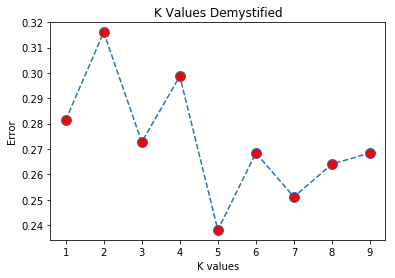

In [184]:
#plot the error vs Kvalues
import matplotlib.pyplot as plt
plt.plot(range(1,10),error,'o-',linestyle='dashed',
        markerfacecolor='red',markersize=10)
plt.xlabel('K values')
plt.ylabel('Error')
plt.title('K Values Demystified' )
plt.show()

# applying Decision Tree Classifier

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model=dtree.fit(xtrain,ytrain)
predictions=dtree.predict(xtest)

In [187]:
print(accuracy_score(ytest,predictions))
print('\n')
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))
print('\n')
print(cohen_kappa_score(ytest,predictions))

0.7229437229437229


[[112  31]
 [ 33  55]]


              precision    recall  f1-score   support

           0       0.77      0.78      0.78       143
           1       0.64      0.62      0.63        88

   micro avg       0.72      0.72      0.72       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



0.4100087796312555


# Applying Random Forest classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(xtrain,ytrain)
predictions=rf.predict(xtest)


C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [190]:
print(accuracy_score(ytest,predictions))
print('\n')
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))
print('\n')
print(cohen_kappa_score(ytest,predictions))

0.7705627705627706


[[127  16]
 [ 37  51]]


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       143
           1       0.76      0.58      0.66        88

   micro avg       0.77      0.77      0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



0.4901511681172698
